Computer vision projects on classifying traffic sign. 

From exporation, there are 34799 training sets and 12630 testing sets. 
Each of the image has 32*32*3.
Roughly around 40+ classes.
The goal is to leverage a unbalance and relativity speaking small dataset to classify with deep neuarl networking.

Recall from deep learning foundations course from deeplearning.ai, classic machine learning requires around 100-10,000 samples and deep learning requires around 1 million sample. 

Given neural network does not require any data balance having each class, I would like to see the difference between data split and also data size. 

In [2]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import tensorflow as tf

# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/test.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

signnames = pd.read_csv('signnames.csv')
label_names = list(signnames)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_valid.shape)
print("Y_valid shape", Y_valid.shape)
print("Y_train shape", X_train.shape)
print("Y_test shape", X_test.shape)

X_train shape (34799, 32, 32, 3)
X_test shape (12630, 32, 32, 3)
Y_valid shape (12630, 32, 32, 3)
Y_valid shape (12630,)
Y_train shape (34799, 32, 32, 3)
Y_test shape (12630, 32, 32, 3)


In [3]:
signnames.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


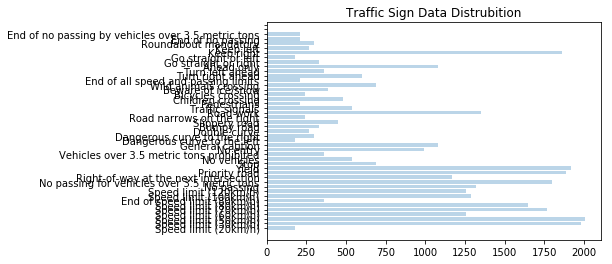

In [4]:
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train

# Get current size
figsize=(15, 7)
 
# Prints: [8.0, 6.0]

item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
plt.figure(11)
plt.yticks(range(len(y_train)), signnames.SignName)
#plt.yticks(list(map(lambda x: label_dict[x], y_train['label'].value_counts().index.tolist())))            
plt.barh(item, count, alpha=0.3)
plt.title('Traffic Sign Data Distrubition')

plt.show()

In [5]:
def preprocess(img):
    img = np.sum(img/3, axis=3, keepdims = True)
    img = img.astype(float) / 255.0
    return np.array(img).reshape((-1,32,32,1)) 

X_train= preprocess(X_train)
X_test= preprocess(X_test)
X_valid = preprocess(X_valid)
n_classes = len(np.unique(y_train))


In [6]:
#shuffle the data afterwards 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.02, random_state=0)


print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_validation.shape)

X_train shape (34103, 32, 32, 1)
X_test shape (12630, 32, 32, 1)
Y_valid shape (696, 32, 32, 1)


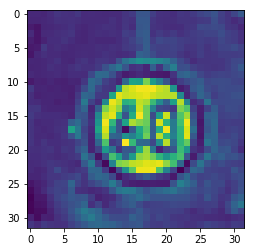

In [7]:
#each time it will show a different image
import random
def showImg(data):
    random = np.random.randint(len(data))
    image = data[random].squeeze()
    plt.figure()
    plt.imshow(image)
    
showImg(X_train)

#first plug into CNN and see how does the accuracy goes

In [8]:
import tensorflow as tf
EPOCHS = 10
BATCH_SIZE = 128

In [9]:
#applying leNet in Tensorflow

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [10]:
#(BATCH_SIZE, height, width, depth)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Placeholder for labels
y = tf.placeholder(tf.int32, (None))

# One-hot encoding of labels
one_hot_y = tf.one_hot(y, 43)

# Probability to keep units
keep_prob = tf.placeholder(tf.float32)

In [11]:
# Learning rate
rate = 0.001
mu = 0 
sigma = 0.1
# Pass input data to the LeNet function
logits = LeNet(x)

# Compare logits to the ground-truth labels and calculate the cross entropy
# Cross entopy is a measure how different the logits
# are from the ground-truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
# Average the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)
# Use Adam algorithm (alternative of stochastic gradient descent)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Optimizer uses backpropagation to update the network and minimize training loss
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [12]:
# Compare the logit prediction to the one hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
# Create the TensorFlow session and Initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training in progress...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training data to ensure that trainint isn't biased
        # by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Break training data into batches and train the model on the each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 0.75})
        
        # In the end of each EPOCH evaluate the model on validation data
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {0} ...".format(i + 1))
        print("Training Accuracy = {:.5f}".format(training_accuracy))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
    
    # Save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_sign_classifier')
    print("Model saved")

Training in progress...

EPOCH 1 ...
Training Accuracy = 0.85130
Validation Accuracy = 0.76065

EPOCH 2 ...
Training Accuracy = 0.93781
Validation Accuracy = 0.84315

EPOCH 3 ...
Training Accuracy = 0.96299
Validation Accuracy = 0.87435

EPOCH 4 ...
Training Accuracy = 0.97220
Validation Accuracy = 0.88369

EPOCH 5 ...
Training Accuracy = 0.98065
Validation Accuracy = 0.88749

EPOCH 6 ...
Training Accuracy = 0.98590
Validation Accuracy = 0.89929

EPOCH 7 ...
Training Accuracy = 0.98897
Validation Accuracy = 0.90071

EPOCH 8 ...
Training Accuracy = 0.99331
Validation Accuracy = 0.90911

EPOCH 9 ...
Training Accuracy = 0.99340
Validation Accuracy = 0.90554

EPOCH 10 ...
Training Accuracy = 0.99537
Validation Accuracy = 0.90823

Model saved


In [14]:
#saver = tf.train.Saver()

with  tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.5f}".format(test_accuracy))

Test Accuracy = 0.90823


In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, Y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 0.995
Valid Accuracy = 0.908
Test Accuracy = 0.908


92% on validation and test accuracy seems still too low. 
in this case, I am planning to generated more data. 

In [ ]:

from tensorflow.contrib.layers import flatten
KEEP_PROB = 0.5

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[3, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')


In [ ]:
# Define all network parameters# Define 
mu = 0
sigma = 0.1

# and training parameters
epochs = 20
batch_size = 128

In [ ]:
#applying leNet in Tensorflow

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [ ]:
import tensorflow as tf
#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
# Setting learning rate, loss functions, and optimizer
#training pipelines
rate = 0.004

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

5x5 convolution (32x32x1 in, 28x28x6 out)
ReLU
2x2 max pool (28x28x6 in, 14x14x6 out)
5x5 convolution (14x14x6 in, 10x10x16 out)
ReLU
2x2 max pool (10x10x16 in, 5x5x16 out)
5x5 convolution (5x5x6 in, 1x1x400 out)
ReLu
Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
Concatenate flattened layers to a single size-800 layer
Dropout layer
Fully connected layer (800 in, 43 out)


